# Downloading DFO Historical Mooring Data
### https://data.cioospacific.ca/erddap/tabledap/IOS_CTD_Moorings.htm
## Constraints:
Limited the search area to the mooring of interest E01. (49.1 - 49.3 & 126 - 126.7) <br>
Limited the time frame to 2018-01-01 to 22-07-21 to minimize download time for this project. 



In [ ]:
import xarray as xr

# have a look at the dataset:

ds = xr.open_dataset("IOS_CTD_Moorings_9614_794f_0026.nc")
#print(ds)
#print(ds.PSALST01.data)
#print(ds.DOXYZZ01)
#print(ds.DOXMZZ01)
#print(ds.filename.data)
print(ds.variables)
ds


## Combine what was learned Below - use a merged Temperature variable for the time series - do not plot Oxygen

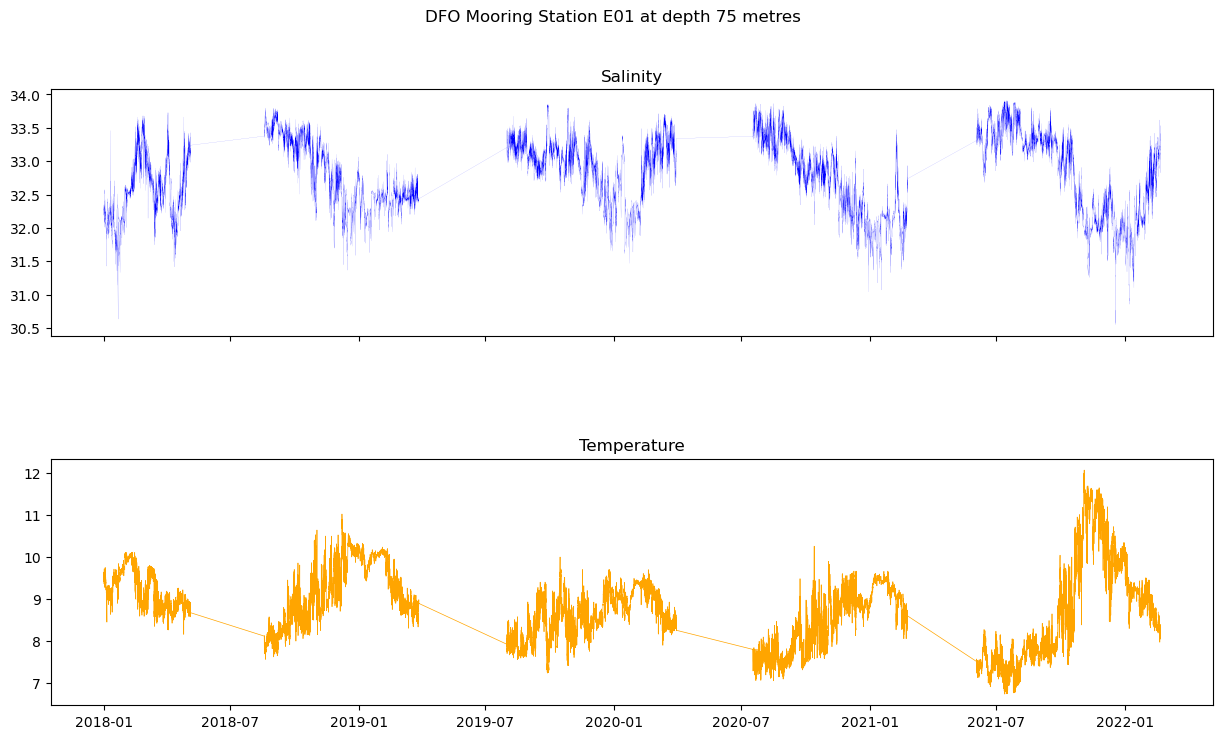

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_dfo_mooring(mooring_depth):
    

    df = pd.DataFrame()
    
    df['Salt'] = ds.sea_water_practical_salinity.data
    df['Temp1'] = ds.sea_water_temperature.data
    df['Temp2'] = ds.TEMPST01.data
    # Get a final temp
    df['Temp'] = np.where(df['Temp1'].isnull(), df['Temp2'], df['Temp1'])
    df['depth'] = ds.depth.data
    df['Time'] = ds.time.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['filename'] = ds.filename.data
    df['file_depth'] = df['filename'].str[-10:-8].astype(int)

    df_depth = df[df['file_depth'] == mooring_depth]

    x = df_depth.Time
    salt = df_depth.Salt
    temp = df_depth.Temp
   
   
    #  try to put labels on the blank shared x axis
    #tcks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    #tklbls = ["2018-01", "2018-07", "2019-01", "2019-07", "2020-01", "2020-07", "2021-01", "2021-07", "2022-01", "2022-01"]
    
    fig, ax = plt.subplots(2, figsize=(15, 8), sharex=True)
   
    ax[0].plot(x, salt, linewidth=0.05, c='blue')
    ax[0].set_title('Salinity')
   
    ax[1].plot(x, temp, linewidth=0.5, c='orange')
    ax[1].set_title("Temperature")
    
    
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 at depth {} metres".format(str(mooring_depth)))
    plt.show()
    
plot_dfo_mooring(75)

### Have a look at the various salinity variables.

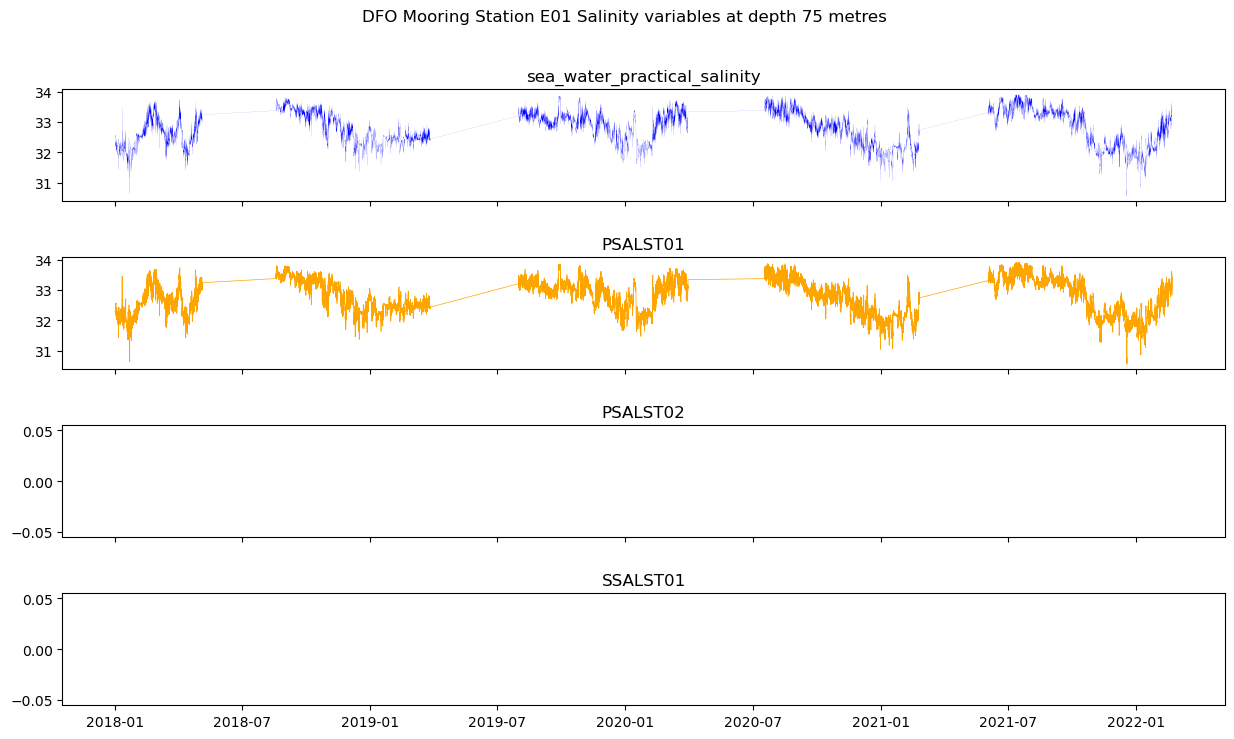

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_dfo_salt(mooring_depth):
    

    df = pd.DataFrame()
    
    df['sea_water_practical_salinity'] = ds.sea_water_practical_salinity.data
    df['PSALST01'] = ds.PSALST01.data
    df['PSALST02'] = ds.PSALST02.data
    df['SSALST01'] = ds.SSALST01.data
    df['Time'] = ds.time.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['filename'] = ds.filename.data
    df['file_depth'] = df['filename'].str[-10:-8].astype(int)

    # isolate the sensor depth
    df_depth = df[df['file_depth'] == mooring_depth]

    x = df_depth.Time
    var1 = df_depth.sea_water_practical_salinity
    var2 = df_depth.PSALST01
    var3 = df_depth.PSALST02
    var4 = df_depth.SSALST01
   
    fig, ax = plt.subplots(4, figsize=(15, 8), sharex=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('sea_water_practical_salinity')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("PSALST01")
    ax[2].plot(x, var3, linewidth=0.5, c='purple')
    ax[2].set_title("PSALST02")
    ax[3].plot(x, var3, linewidth=0.5, c='purple')
    ax[3].set_title("SSALST01")
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Salinity variables at depth {} metres".format(str(mooring_depth)))
    plt.show()
    
plot_dfo_salt(75)

### Have a look at the various temperature variables.

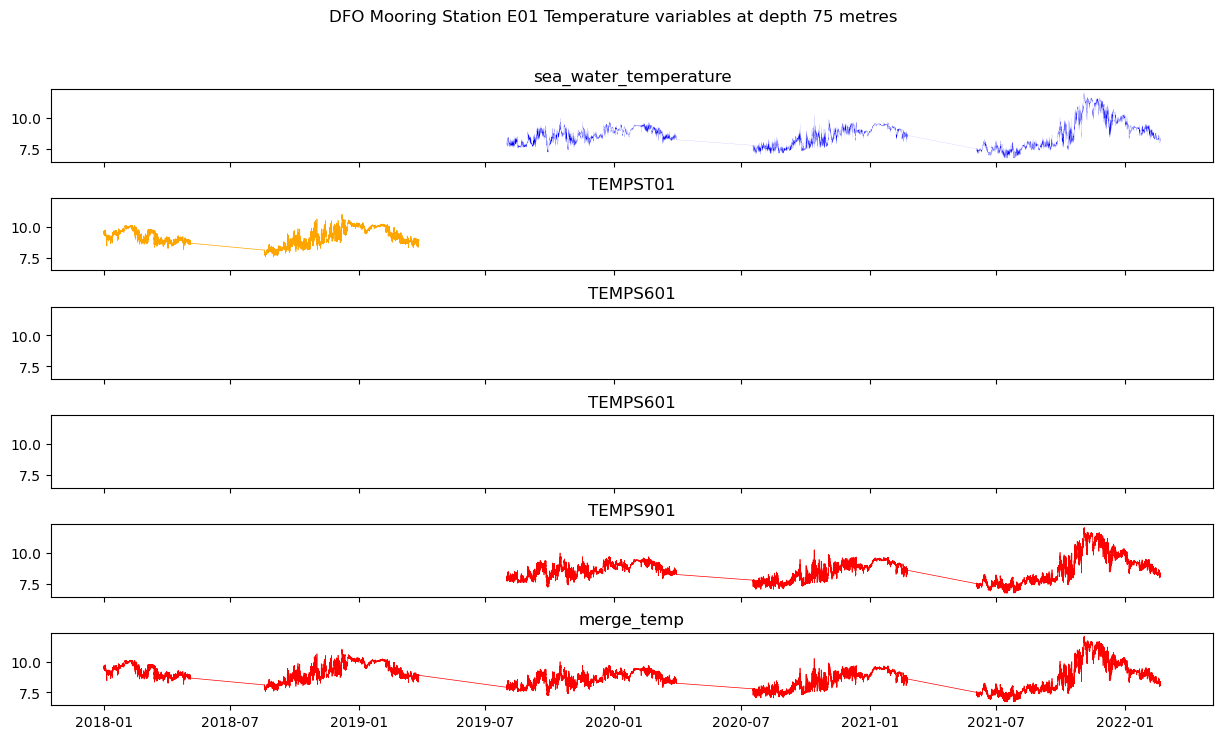

In [7]:
def plot_dfo_temp(mooring_depth):
    
    df = pd.DataFrame()
    
    df['sea_water_temperature'] = ds.sea_water_temperature.data
    df['TEMPST01'] = ds.TEMPST01.data
    df['TEMPS601'] = ds.TEMPS601.data
    df['TEMPS602'] = ds.TEMPS602.data
    #df['TEMPS902'] = ds.TEMPS902.data - ? doesn't exist
    df['TEMPS901'] = ds.TEMPS901.data
    df['Time'] = ds.time.data
    df['filename'] = ds.filename.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['file_depth'] = df['filename'].str[-10:-8].astype(int)
    df['depth'] = ds.depth.data
    
    #  Saw some data gaps - populated the nans with TEMPST01
    #  Merge the two temp columns
    df['merge_temp'] = np.where(df['sea_water_temperature'].isnull(), df['TEMPST01'], df['sea_water_temperature'])
    
    # isolate the sensor depth
    df_depth = df[df['file_depth'] == mooring_depth]
    
    # look at the depth range for 75m sensors - can we use this in the erddap option?
    # print(df_depth['depth'].max()) # 80.15737  
    # print(df_depth['depth'].min()) # 68.238

    x = df_depth.Time
    var1 = df_depth.sea_water_temperature
    var2 = df_depth.TEMPST01
    var3 = df_depth.TEMPS601
    var4 = df_depth.TEMPS602
    var5 = df_depth.TEMPS901
    var6 = df_depth.merge_temp
    
   
    fig, ax = plt.subplots(6, figsize=(15, 8), sharex=True, sharey=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('sea_water_temperature')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("TEMPST01")
    ax[2].plot(x, var3, linewidth=0.5, c='purple')
    ax[2].set_title("TEMPS601")
    ax[3].plot(x, var4, linewidth=0.5, c='green')
    ax[3].set_title("TEMPS601")
    ax[4].plot(x, var5, linewidth=0.5, c='red')
    ax[4].set_title("TEMPS901")
    ax[5].plot(x, var6, linewidth=0.5, c='red')
    ax[5].set_title("merge_temp")
    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Temperature variables at depth {} metres".format(str(mooring_depth)))
    plt.show()
    
plot_dfo_temp(75)

### Have a look at the various oxygen variables.

In [ ]:
#  Not seeing any oxy in this time frame at any depth.

def plot_dfo_oxy(mooring_depth):
    
    df = pd.DataFrame()
    
    df['DOXYZZ01'] = ds.DOXYZZ01.data
    df['DOXMZZ01'] = ds.DOXMZZ01.data
    df['Time'] = ds.time.data
    df['filename'] = ds.filename.data
    
    #  Need to figure a better way to capture sensor depths - using this from the filename for now
    df['file_depth'] = df['filename'].str[-10:-8].astype(int)
    df['depth'] = ds.depth.data

    # isolate the sensor depth
    df_depth = df[df['file_depth'] == mooring_depth]
    

    x = df_depth.Time
    var1 = df_depth.DOXYZZ01
    var2 = df_depth.DOXMZZ01
    
   
    fig, ax = plt.subplots(2, figsize=(15, 8), sharex=True, sharey=True)
   
    ax[0].plot(x, var1, linewidth=0.05, c='blue')
    ax[0].set_title('DOXYZZ01')
    ax[1].plot(x, var2, linewidth=0.5, c='orange')
    ax[1].set_title("DOXMZZ01")

    fig.subplots_adjust(hspace=0.5)
    plt.suptitle("DFO Mooring Station E01 Oxygen variables at depth {} metres".format(str(mooring_depth)))
    plt.show()
    
plot_dfo_oxy(90)